In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import sklearn
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

In [ ]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.isnull().values.any()     #missing values

False

In [ ]:
a = ((data['Outcome']==1).sum()) + ((data['Outcome']==0).sum())
b = data.shape[0]
print(a >= b)                                                    #if True then no error

True


In [ ]:
Y = data['Outcome']
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
del data["Outcome"]
data                       #skinThickness never be 0 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
"""print(data.isnull().values.any())  #finding the missing values
print(data.isnull().sum(axis = 0)) #each column 
#data.isnull().sum(axis = 1)   for each row 
"""
data = data.replace(0, np.nan)
data.isnull().sum()
#data['a']=data['a'].replace(0,data['a'].median())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [ ]:
data = data.fillna(data.median())
data.median()

Pregnancies                   4.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
dtype: float64

In [ ]:
statistic_data = data.describe()    #a statistic data is a dataframe
statistic_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.423177,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885
std,2.980481,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,2.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
print("shape of statistic_data of dataFrame is ", end = " ")
print(statistic_data.shape)
print("shape of data", end = " ")
print(data.shape)

shape of statistic_data of dataFrame is  (8, 8)
shape of data (768, 8)


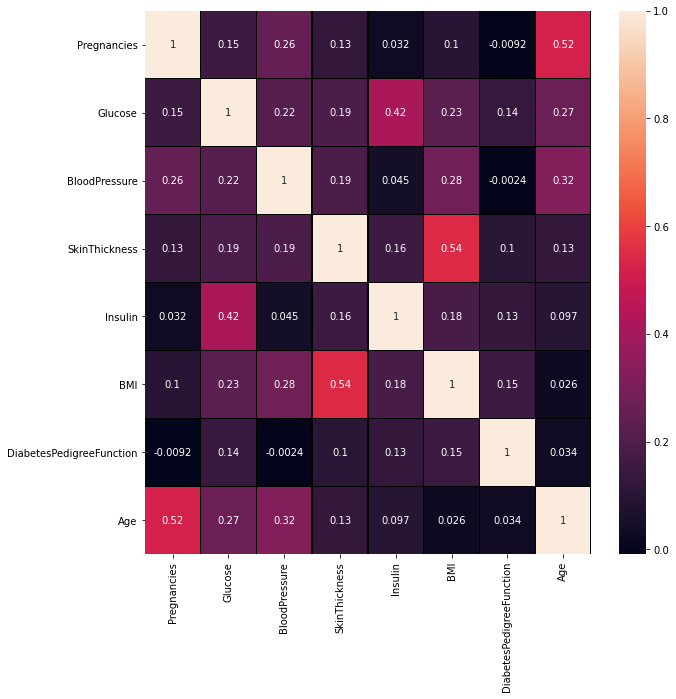

In [ ]:
fig, map = plt.subplots(figsize=(10,10))
correlation = data.corr()                                                        # correlation dataframe is to tell correlation between the different parameters
map = sns.heatmap(data.corr(),annot = True, linewidths=.5, linecolor='black')
map  

In [ ]:
correlation 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.153525,0.255967,0.126082,0.032397,0.100870,-0.009198,0.522303
Glucose,0.153525,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909
BloodPressure,0.255967,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915
SkinThickness,0.126082,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107
Insulin,0.032397,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101
BMI,0.100870,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597
DiabetesPedigreeFunction,-0.009198,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561
Age,0.522303,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, Y, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
forest = RandomForestRegressor(n_estimators=60, random_state=0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)   #stratify testing , pipelines , grid serach 

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred.round()))
print("Precision:",precision_score(y_test, y_pred.round()))
# recall and f1 score(harmonic means of precision and recall), ROC(receiver operatiing characterstic) , AUC

Accuracy: 0.8246753246753247
Precision: 0.7


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2770562770562771
Mean Squared Error: 0.1376190476190476
Root Mean Squared Error: 0.370970413401187


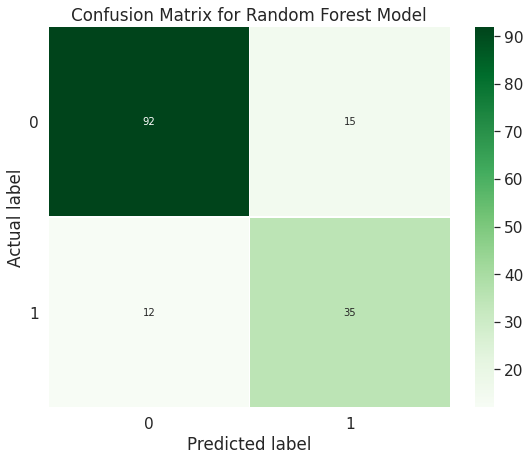

In [ ]:
matrix = confusion_matrix(y_test, y_pred.round())                       #
#matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names =  [0,1]   #['Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']
tick_marks = np.arange(len(class_names)) +.5
tick_marks2 = tick_marks 
plt.xticks(tick_marks, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       107
           1       0.70      0.74      0.72        47

    accuracy                           0.82       154
   macro avg       0.79      0.80      0.80       154
weighted avg       0.83      0.82      0.83       154



In [ ]:
#"""LogisticRegression"""
logreg = linear_model.LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
model_log = logreg.fit(X_train, y_train)
y_pred_test = logreg.predict(X_test)

In [ ]:
reg_matrix = confusion_matrix(y_test, y_pred_test)
reg_matrix

array([[79, 28],
       [ 7, 40]])

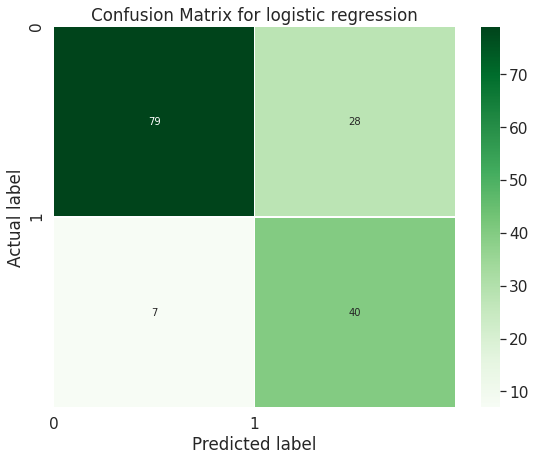

In [ ]:
plt.figure(figsize=(9,7))
sns.set(font_scale=1.4)
sns.heatmap(reg_matrix, annot=True, annot_kws={'size':10}, cmap=plt.cm.Greens, linewidths=0.2)
class_names=[0,1] # name  of classes
tick_marks = np.arange(len(class_names))
tick_marks2= tick_marks
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks2, class_names)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title('Confusion Matrix for logistic regression')
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Mean Absolute Error: 0.22727272727272727
Mean Squared Error: 0.22727272727272727
Root Mean Squared Error: 0.4767312946227962


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))

Accuracy: 0.7727272727272727
Precision: 0.5882352941176471


In [ ]:
data.insert(8, "Outcome", Y)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47,1


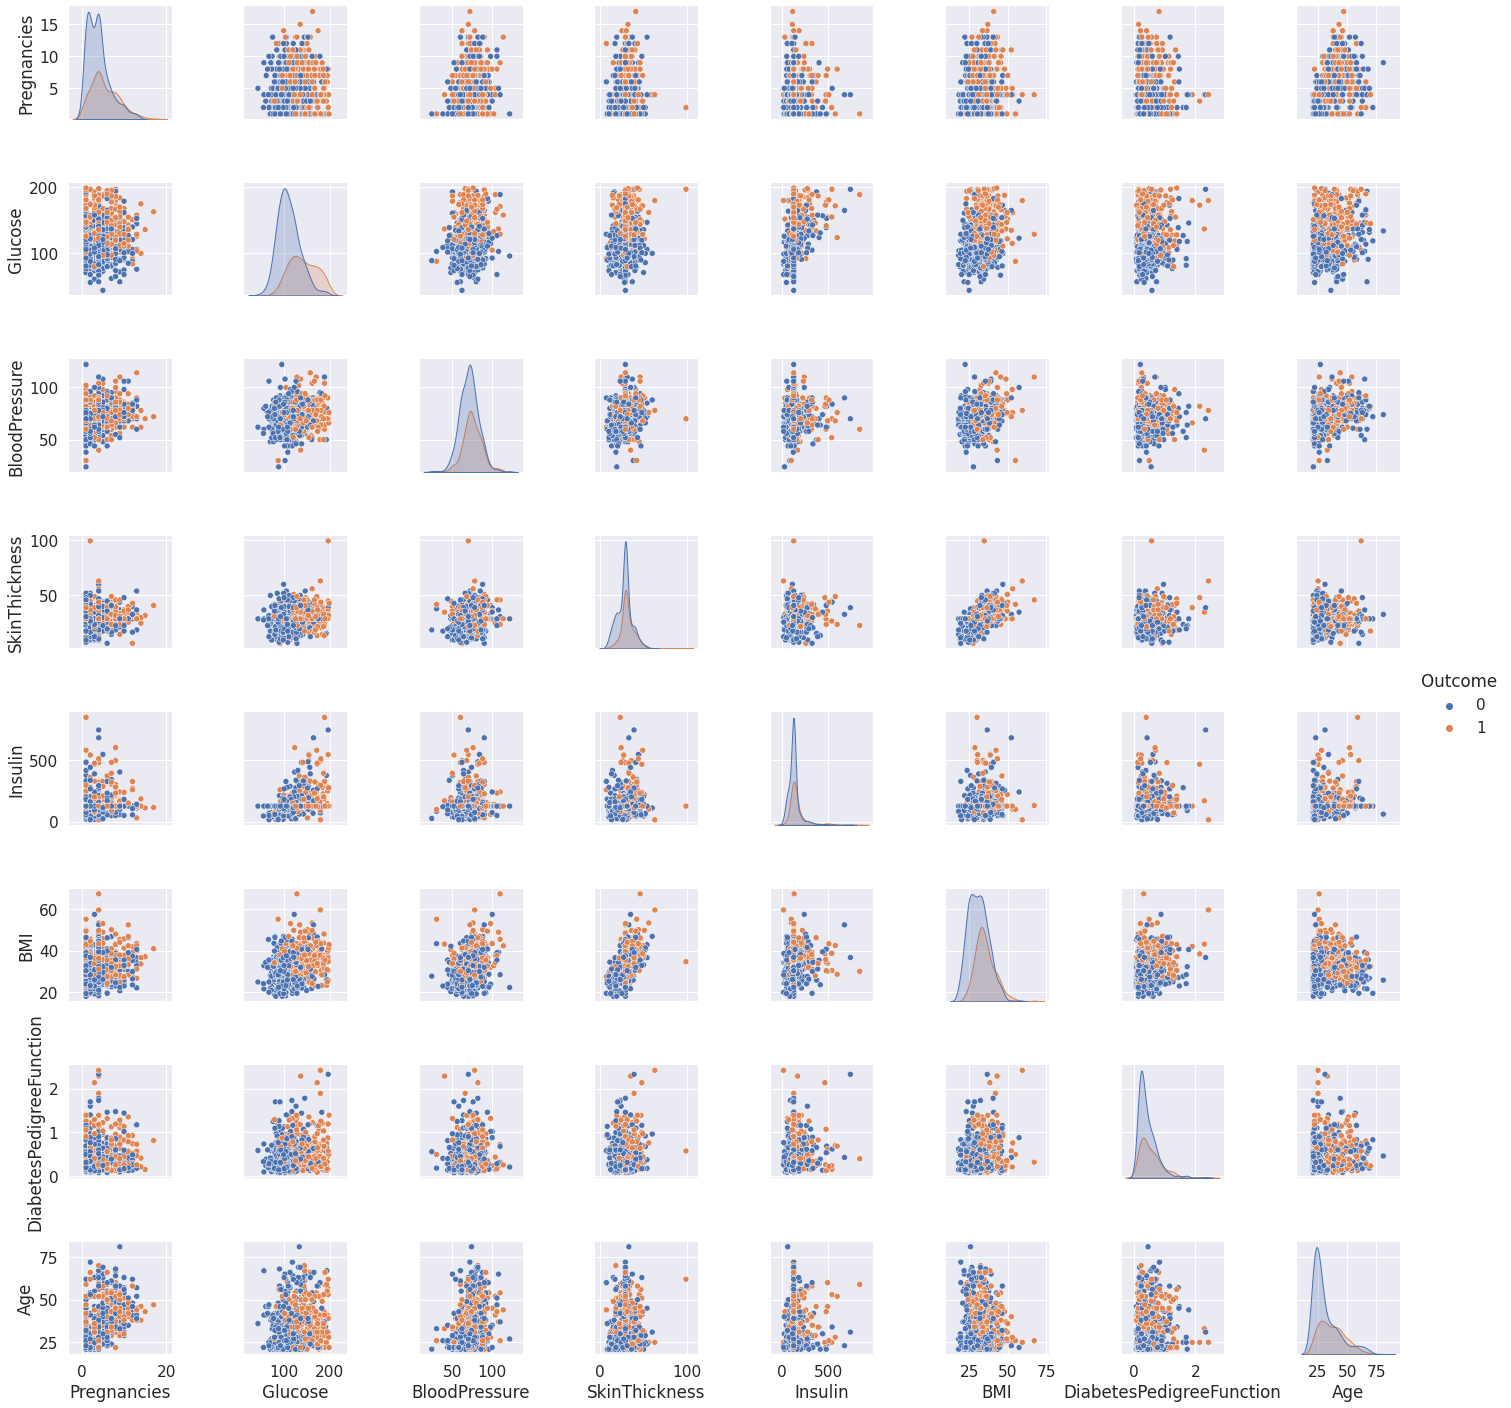

In [ ]:
sns.pairplot(data, hue = "Outcome")

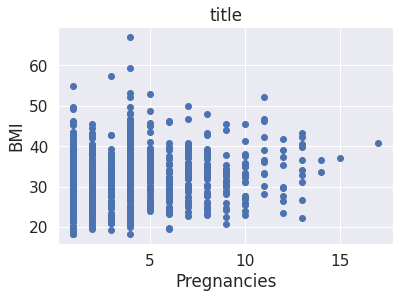

In [ ]:
plt.scatter(data['Pregnancies'], data['BMI'])
plt.title("title")
plt.xlabel("Pregnancies")
plt.ylabel("BMI")
plt.show()

slope :  2.0608761026482667


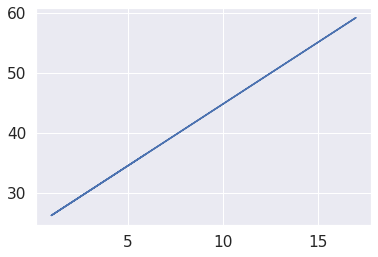

In [ ]:
from sklearn.linear_model import LinearRegression
X = data[['Pregnancies']]
Y = data['Age']
model = LinearRegression().fit(X, Y)
plt.plot( X, model.predict(X) )
print("slope : ", model.coef_[0])

slope :  0.2326799538979842


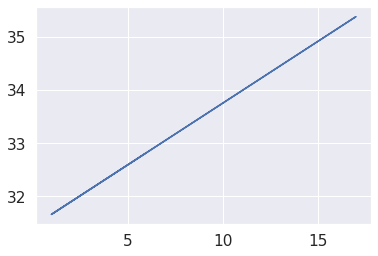

In [ ]:
from sklearn.linear_model import LinearRegression
X = data[['Pregnancies']]
Y = data['BMI']
model = LinearRegression().fit(X, Y)
plt.plot( X, model.predict(X) )
print("slope : ", model.coef_[0])

slope :  -0.0010225040671785323


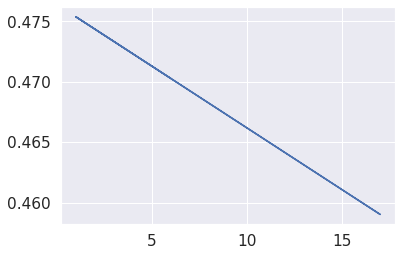

In [ ]:
from sklearn.linear_model import LinearRegression
X = data[['Pregnancies']]
Y = data['DiabetesPedigreeFunction']
model = LinearRegression().fit(X, Y)
plt.plot( X, model.predict(X) )
print("slope : ", model.coef_[0])

slope :  0.938969867237893


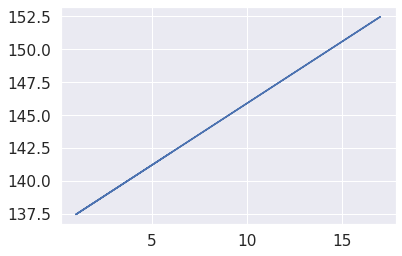

In [ ]:
from sklearn.linear_model import LinearRegression
X = data[['Pregnancies']]
Y = data['Insulin']
model = LinearRegression().fit(X, Y)
plt.plot( X, model.predict(X) )
print("slope : ", model.coef_[0])

slope :  0.3718923325682153


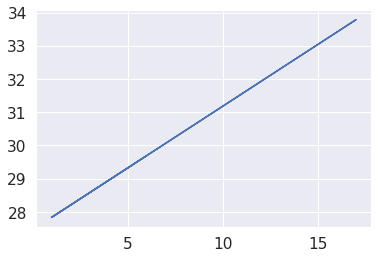

In [ ]:
from sklearn.linear_model import LinearRegression
X = data[['Pregnancies']]
Y = data['SkinThickness']
model = LinearRegression().fit(X, Y)
plt.plot( X, model.predict(X) )
print("slope : ", model.coef_[0])

slope :  1.0388713911613852


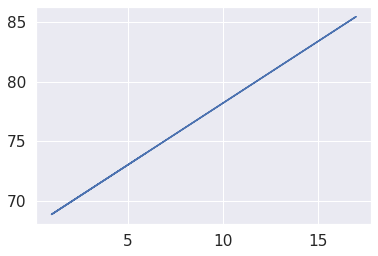

In [ ]:
from sklearn.linear_model import LinearRegression
X = data[['Pregnancies']]
Y = data['BloodPressure']
model = LinearRegression().fit(X, Y)
plt.plot( X, model.predict(X) )
print("slope : ", model.coef_[0])

slope :  1.5678828484410563


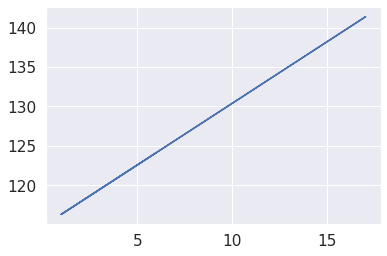

In [ ]:
from sklearn.linear_model import LinearRegression
X = data[['Pregnancies']]
Y = data['Glucose']
model = LinearRegression().fit(X, Y)
plt.plot( X, model.predict(X) )
print("slope : ", model.coef_[0])

slope :  0.03971377917853023


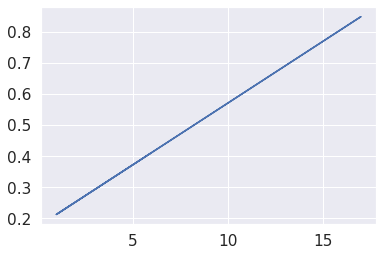

In [ ]:
from sklearn.linear_model import LinearRegression
X = data[['Pregnancies']]
Y = data['Outcome']
model = LinearRegression().fit(X, Y)
plt.plot( X, model.predict(X) )
print("slope : ", model.coef_[0])

slope :  0.007721632144449066


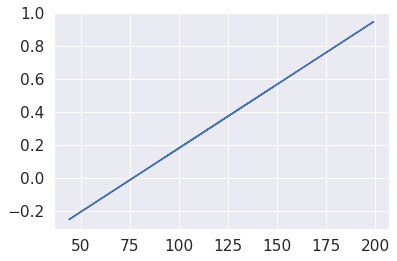

In [ ]:
from sklearn.linear_model import LinearRegression
X = data[['Glucose']]
Y = data['Outcome']
model = LinearRegression().fit(X, Y)
plt.plot( X, model.predict(X) )
print("slope : ", model.coef_[0])

slope :  0.006534191337786755


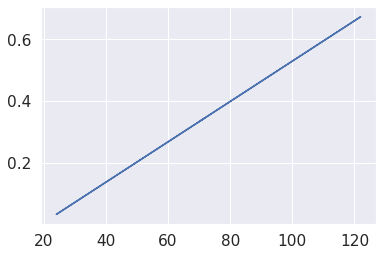

In [ ]:
from sklearn.linear_model import LinearRegression
X = data[['BloodPressure']]
Y = data['Outcome']
model = LinearRegression().fit(X, Y)
plt.plot( X, model.predict(X) )
print("slope : ", model.coef_[0])

slope :  0.01165754764354513


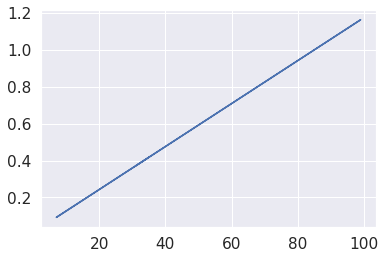

In [ ]:
from sklearn.linear_model import LinearRegression
X = data[['SkinThickness']]
Y = data['Outcome']
model = LinearRegression().fit(X, Y)
plt.plot( X, model.predict(X) )
print("slope : ", model.coef_[0])

slope :  0.0011251984445509343


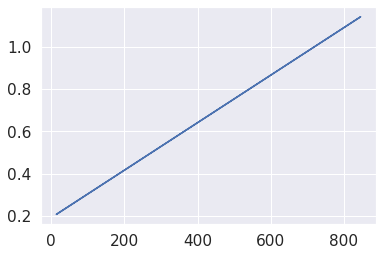

In [ ]:
from sklearn.linear_model import LinearRegression
X = data[['Insulin']]
Y = data['Outcome']
model = LinearRegression().fit(X, Y)
plt.plot( X, model.predict(X) )
print("slope : ", model.coef_[0])

slope :  0.021647023679915195


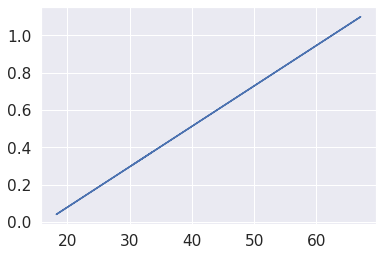

In [ ]:
from sklearn.linear_model import LinearRegression
X = data[['BMI']]
Y = data['Outcome']
model = LinearRegression().fit(X, Y)
plt.plot( X, model.predict(X) )
print("slope : ", model.coef_[0])

slope :  0.2502505602798031


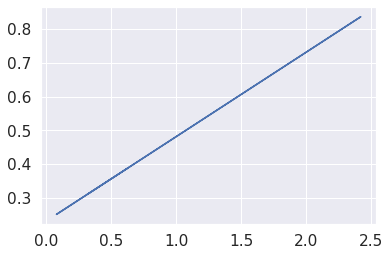

In [ ]:
from sklearn.linear_model import LinearRegression
X = data[['DiabetesPedigreeFunction']]
Y = data['Outcome']
model = LinearRegression().fit(X, Y)
plt.plot( X, model.predict(X) )
print("slope : ", model.coef_[0])

slope :  0.009666834703521695


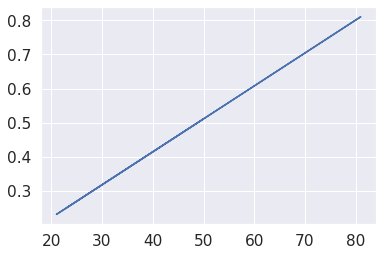

In [ ]:
from sklearn.linear_model import LinearRegression
X = data[['Age']]
Y = data['Outcome']
model = LinearRegression().fit(X, Y)
plt.plot( X, model.predict(X) )
print("slope : ", model.coef_[0])

In [ ]:
#""""BY numpy"""

Y = data['Outcome'].to_numpy(dtype = 'float')  #consist of X5 

X = data.to_numpy(dtype = 'float')
X = X[:,:-1]

X_transpose = X.transpose()              #transpose of X contains X0,X1,X2,X3,X4

X_X_transpose = X_transpose @ X                   #multiplication of two matrixs 
 
XX_transpose_inv = np.linalg.inv(X_X_transpose)

n = len(Y)

In [ ]:
cofficients = XX_transpose_inv @ X_transpose @ Y 
print(cofficients)     #'Pregnancies',	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age' 

[ 0.02896146  0.00519289 -0.00857078 -0.00096245 -0.00010651  0.00651161
  0.08961984  0.00053648]


In [ ]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [ ]:
x = data[['Pregnancies','Glucose', 'BloodPressure','SkinThickness', 'Insulin', 'BMI',	'DiabetesPedigreeFunction','Age']] #,	'Glucose',	'BloodPressure',	'SkinThickness',	'Insulin','	BMI',	'DiabetesPedigreeFunction','Age']]
y = data['Outcome']
model = linear_model.LinearRegression()
model.fit(x, y)
cofficient = model.coef_
print(cofficient)

[ 0.02314227  0.00650967 -0.00143602  0.00015291 -0.00014796  0.01387063
  0.12741962  0.00234943]
